In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PATH = "./measurements/full-x4"

In [3]:
fechas=['2021-11-03_17-49-11','2021-11-05_16-07-41','2021-11-05_18-09-50','2021-11-08_15-57-42','2021-11-08_18-00-42']
data=[]

for i in fechas:
    data.append(pd.read_csv(f"{PATH}/{i}/figuras/area_{i}.csv"))

In [4]:
data=pd.concat(data)

In [5]:
len(data['Area1'])

26

In [6]:
#OBSERVACIONES EN EL TIEMPO: x, por el eje. ESTO PARA LA MEDICIÓN ANTERIOR, NO BORRAR

#1/4 porque son 4 mediciones en un día, así queda en función de los días
dt=1/4

x= np.arange(0,len(data['Area1'])/4,1/4)

In [7]:
#AREAS
area1=[]
area2=[]
area3=[]
area4=[]

for i in range(len(fechas)):
    area1.append(np.array(data['Area1']))
    area2.append(np.array(data['Area2']))
    area3.append(np.array(data['Area3']))
    area4.append(np.array(data['Area4']))

area1=np.concatenate(area1)
area2=np.concatenate(area2)
area3=np.concatenate(area3)
area4=np.concatenate(area4)

In [8]:
#op2
c1=np.array([data['Area1']])/(25*60)
c2=np.array([data['Area2']])/(25*60)
c3=np.array([data['Area3']])/(25*60)
c4=np.array([data['Area4']])/(25*60)

In [9]:
area1

array([ 831631. ,  974841. ,  790587.5,  284659. , 1157460.5, 1144820. ,
       1267513.5,  677947.5,  988622. , 1026005.5, 1006854.5, 1093228.5,
       2338944. , 1885632.5, 1497286. , 1230042. ,  938509.5,  807984. ,
        699564. , 2250000. , 1651300.5, 2301928. , 1620841. , 1332368.5,
       1418490. , 1294032.5,  831631. ,  974841. ,  790587.5,  284659. ,
       1157460.5, 1144820. , 1267513.5,  677947.5,  988622. , 1026005.5,
       1006854.5, 1093228.5, 2338944. , 1885632.5, 1497286. , 1230042. ,
        938509.5,  807984. ,  699564. , 2250000. , 1651300.5, 2301928. ,
       1620841. , 1332368.5, 1418490. , 1294032.5,  831631. ,  974841. ,
        790587.5,  284659. , 1157460.5, 1144820. , 1267513.5,  677947.5,
        988622. , 1026005.5, 1006854.5, 1093228.5, 2338944. , 1885632.5,
       1497286. , 1230042. ,  938509.5,  807984. ,  699564. , 2250000. ,
       1651300.5, 2301928. , 1620841. , 1332368.5, 1418490. , 1294032.5,
        831631. ,  974841. ,  790587.5,  284659. , 

La fórmula es 
g= $\frac{F CT 44 g/mol}{22414 . 10^6 0.001L/mol}$

Con F el flujo (1.5L/min), CT el área bajo la curva en MINUTOS, como lo tenemos en segundos:

g= $\frac{F* CT/60 * 44 g/mol}{22414 . 10^6 0.001L/mol}$

In [10]:
F = 1.5
den = 22414 * 0.001 * 10 ** 6

def gramos(x): #meter el área
    return F * x *6*60*44 / (den)


In [11]:
gramos1=gramos(c1)
gramos2=gramos(c2)
gramos3=gramos(c3)
gramos4=gramos(c4)

In [12]:
#Gramos acumulados, suponiendo que ese valor se produjo durante 6h
gramos1_ac=np.add.accumulate(gramos1[0])
gramos2_ac=np.add.accumulate(gramos2[0])
gramos3_ac=np.add.accumulate(gramos3[0])
gramos4_ac=np.add.accumulate(gramos4[0])

In [13]:
def error(x): #INTRODUCIR LA CONCENTRACIÓN
    sigma_F=0.1
    sigma_A=50 + x*0.05
    A=sigma_F*x*6*60*44/den
    B=sigma_A*F*6*60*44/den
    return (A**2 + B**2)

In [14]:
error_g1=error(c1[0]) #var
error_g2=error(c2[0]) #var
error_g3=error(c3[0]) #var
error_g4=error(c4[0]) #var

In [15]:
error_g1_ac=np.add.accumulate(error_g1)
error_g2_ac=np.add.accumulate(error_g2)
error_g3_ac=np.add.accumulate(error_g3)
error_g4_ac=np.add.accumulate(error_g4)

Cada área tomada fue de 25 minutos, por tanto, hacemos regla de 3 simples para comparar con el de titulacion (5.5h)

25 min ---- area

5.5h=330min ----

se debe multiplicar al eje Y por 330/25=13.2 ¿¿¿???

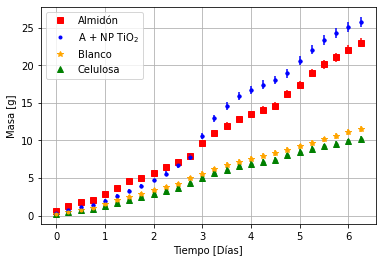

In [16]:
plt.plot(x,gramos1_ac,'s',label='Almidón',color='red')
plt.plot(x,gramos3_ac,'.',label='A + NP TiO$_2$',color='blue')
plt.plot(x,gramos4_ac,'*',label='Blanco',color='orange')
plt.plot(x,gramos2_ac,'^',label='Celulosa',color='green')

plt.legend()

plt.errorbar(x,gramos1_ac,yerr=error_g1_ac**0.5,fmt='.',color='red')
plt.errorbar(x,gramos2_ac,yerr=error_g2_ac**0.5,fmt='.',color='green')
plt.errorbar(x,gramos3_ac,yerr=error_g3_ac**0.5,fmt='.',color='blue')
plt.errorbar(x,gramos4_ac,yerr=error_g4_ac**0.5,fmt='.',color='orange')

#plt.title('CO2 acumulado - sensor')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_primer-medicion.png")
plt.show()

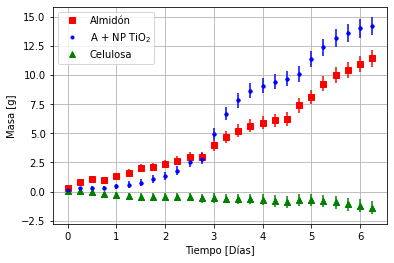

In [17]:
plt.errorbar(x,gramos1_ac-gramos4_ac,yerr=(error_g1_ac+error_g4_ac)**0.5,fmt='.',color='red')
plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='^',color='green')
plt.errorbar(x,gramos3_ac-gramos4_ac,yerr=(error_g3_ac+error_g4_ac)**0.5,fmt='.',color='blue')

plt.plot(x,gramos1_ac-gramos4_ac,'s',label='Almidón',color='red')
plt.plot(x,gramos3_ac-gramos4_ac,'.',label='A + NP TiO$_2$',color='blue')
plt.plot(x,gramos2_ac-gramos4_ac,'^',label='Celulosa',color='green')

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('Masa [g]')
plt.grid(True)
plt.savefig("co2_acumulado-sensor_primer-medicion-restado.png")
plt.show()

# BIODEG

In [18]:
#C6H10O5
g_almidon_teo=6*12 + 10*1 + 5*16

#cada esa cantidad de almidón, hay 6*C=6*12=72 gramos de carbono
#entonces cuánto hay en 20g de muestra:

g_C_mtra=16.67*72/g_almidon_teo

g_CO2_teo=g_C_mtra*44/12

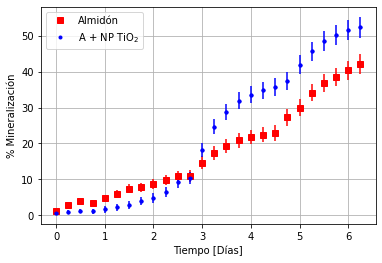

In [19]:
#Grafico el porcentaje de biodeg

plt.errorbar(x,(gramos1_ac-gramos4_ac)*100/g_CO2_teo,yerr=100*(error_g1_ac+error_g4_ac)**0.5 / g_CO2_teo,fmt='.',color='red')
#plt.errorbar(x,gramos2_ac-gramos4_ac,yerr=(error_g2_ac+error_g4_ac)**0.5,fmt='^',color='green')
plt.errorbar(x,(gramos3_ac-gramos4_ac)*100/g_CO2_teo,yerr=100*(error_g3_ac+error_g4_ac)**0.5 / g_CO2_teo,fmt='.',color='blue')

plt.plot(x,(gramos1_ac-gramos4_ac)*100/g_CO2_teo,'s',label='Almidón',color='red')
plt.plot(x,(gramos3_ac-gramos4_ac)*100/g_CO2_teo,'.',label='A + NP TiO$_2$',color='blue')
#plt.plot(x,(gramos2_ac-gramos4_ac)*100/g_CO2_teo,'^',label='Celulosa',color='green')

plt.legend()

#plt.title('CO2 acumulado - sensor- restado')
plt.xlabel('Tiempo [Días]')
plt.ylabel('% Mineralización')
plt.grid(True)
plt.savefig("biodeg_sensor_primer-medicion-restado.png")
plt.show()